In [1]:
# Importando bibliotecas
# Importing libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from datetime import datetime, timedelta
import time

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import seaborn as sns

In [2]:
# Upload em dataset
#Uploading dataset
df = pd.read_csv('./dataset.csv')
df.head()

,temperature,humidity,lux,temperature_status,humidity_status,lux_status,climate_switch,door_actuator,light_switch,timestamp,environment_temperature,environment_lux,label
0,28.000000,68.000000,1.000000,1,1,1,1,1,1,1.685969e+09,23,500,0
1,27.833341,66.864547,475.000000,1,1,1,1,1,1,1.685969e+09,23,500,0
2,27.673610,66.398907,475.546298,1,1,1,1,1,1,1.685969e+09,23,500,0
3,27.422656,65.512299,476.272391,1,1,1,1,1,1,1.685969e+09,23,500,0
4,27.348602,64.614659,476.713019,1,1,1,1,1,1,1.685969e+09,23,500,0


In [3]:
print(f'Lines: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Lines: 8401
Columns: 13


In [4]:
y = df['label']
df['label'].value_counts()

label
0    4201
1    1400
2    1400
3    1400
Name: count, dtype: int64

In [5]:
x_dataset = df[['temperature', 'humidity', 'lux', 'temperature_status', 'humidity_status', 'lux_status', 'climate_switch', 'light_switch', 'timestamp', 'environment_temperature', 'environment_lux']]
x_dataset.head()

,temperature,humidity,lux,temperature_status,humidity_status,lux_status,climate_switch,light_switch,timestamp,environment_temperature,environment_lux
0,28.000000,68.000000,1.000000,1,1,1,1,1,1.685969e+09,23,500
1,27.833341,66.864547,475.000000,1,1,1,1,1,1.685969e+09,23,500
2,27.673610,66.398907,475.546298,1,1,1,1,1,1.685969e+09,23,500
3,27.422656,65.512299,476.272391,1,1,1,1,1,1.685969e+09,23,500
4,27.348602,64.614659,476.713019,1,1,1,1,1,1.685969e+09,23,500


In [6]:
# Função para normalizar os dados
# Function to normalize data
scaler = MinMaxScaler()
x = (x_dataset - x_dataset.min()) / (x_dataset.max() - x_dataset.min())
x = x.fillna(0)
x.head()

,temperature,humidity,lux,temperature_status,humidity_status,lux_status,climate_switch,light_switch,timestamp,environment_temperature,environment_lux
0,0.875274,0.906788,0.002000,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,0.0
1,0.870064,0.891646,0.950000,1.0,1.0,1.0,1.0,1.0,0.000119,0.0,0.0
2,0.865071,0.885437,0.951093,1.0,1.0,1.0,1.0,1.0,0.000238,0.0,0.0
3,0.857226,0.873614,0.952545,1.0,1.0,1.0,1.0,1.0,0.000357,0.0,0.0
4,0.854911,0.861644,0.953426,1.0,1.0,1.0,1.0,1.0,0.000476,0.0,0.0


In [7]:
# Função para verificar correlação dos dados
# Function to check data correlation
corr = x.corr()
corr

,temperature,humidity,lux,temperature_status,humidity_status,lux_status,climate_switch,light_switch,timestamp,environment_temperature,environment_lux
temperature,1.000000,0.877698,0.055234,0.355218,0.355218,0.355218,0.347738,0.340128,-0.824602,NaN,NaN
humidity,0.877698,1.000000,0.231430,-0.115819,0.405851,0.405851,0.401913,0.398302,-0.790012,NaN,NaN
lux,0.055234,0.231430,1.000000,-0.263646,-0.280256,0.448394,-0.266078,0.371943,-0.343026,NaN,NaN
temperature_status,0.355218,-0.115819,-0.263646,1.000000,-0.090897,-0.090897,-0.090897,-0.090897,-0.130596,NaN,NaN
humidity_status,0.355218,0.405851,-0.280256,-0.090897,1.000000,-0.090897,-0.090897,-0.090897,-0.217619,NaN,NaN
lux_status,0.355218,0.405851,0.448394,-0.090897,-0.090897,1.000000,-0.090897,-0.090897,-0.304642,NaN,NaN
climate_switch,0.347738,0.401913,-0.266078,-0.090897,-0.090897,-0.090897,1.000000,-0.090897,-0.391665,NaN,NaN
light_switch,0.340128,0.398302,0.371943,-0.090897,-0.090897,-0.090897,-0.090897,1.000000,-0.478688,NaN,NaN
timestamp,-0.824602,-0.790012,-0.343026,-0.130596,-0.217619,-0.304642,-0.391665,-0.478688,1.000000,NaN,NaN
environment_temperature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.05, 'Corelação de Recursos')

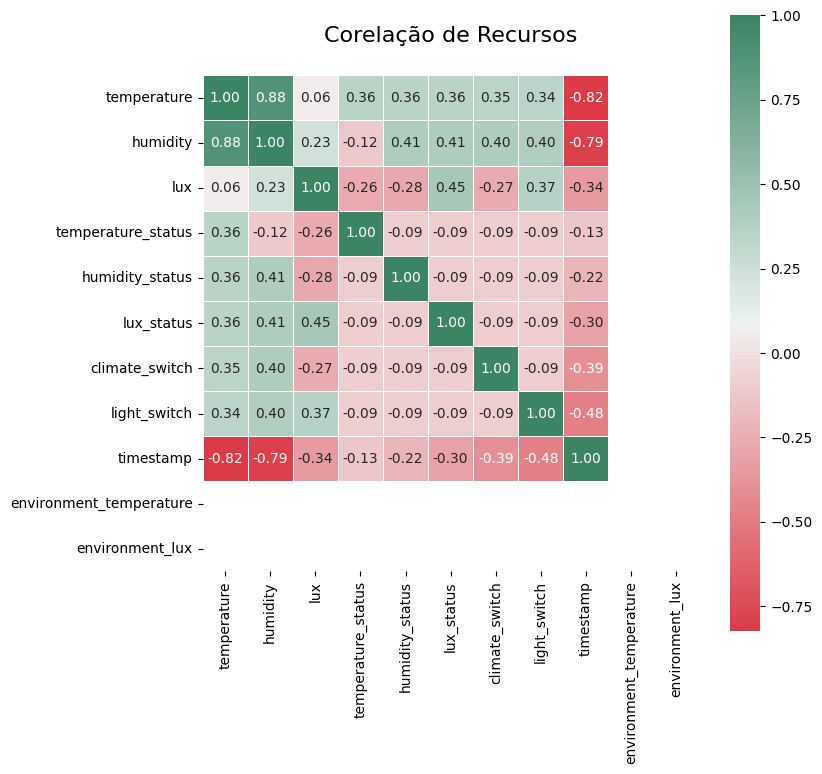

In [8]:
# Apresenta graficamente a função dos dados
# Graphically presenting the data function
corr = x.corr()
colormap = sns.diverging_palette(10, 150, as_cmap = True)
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            cmap = colormap, linewidths=0.5, linecolor='white')
plt.title('Corelação de Recursos', y=1.05, size=16)

In [9]:
# Seperação dos dados em teino e teste
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(f'Treinamento: {x_train.shape[0]}  ---  {(x_train.shape[0]/x.shape[0])*100:.2f}%')
print(f'Teste: {x_test.shape[0]}  ---  {(x_test.shape[0]/x.shape[0])*100:.2f}%')

Treinamento: 5880  ---  69.99%
Teste: 2521  ---  30.01%


In [10]:
# Obter rótulos das classes
# Getting class labels
names = ['normal', 'falha_clima', 'falha_ilumincao', 'falha_iluminacao_clima']
classes = [names[i - 1] for i in df['label'].unique()]
index = np.arange(len(classes))
classes

['falha_iluminacao_clima', 'normal', 'falha_clima', 'falha_ilumincao']

# MLP

In [11]:
# Modelagem da rede neural com os hiperparâmetros configurados
# Modeling the neural network with configured hyperparameters
modelMLP = MLPClassifier(hidden_layer_sizes=(256, 64), activation='logistic', max_iter=1000, random_state=42)
modelMLP.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(256, 64),
              max_iter=1000, random_state=42)

In [12]:
# Realizando predições
# Making predictions
predictsMLP = modelMLP.predict(x_test)

accuracyMLP = accuracy_score(y_test, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')

reportMLP = classification_report(y_test, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.9920666402221341

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    0.9992    0.9996      1281
           1     0.9975    1.0000    0.9988       402
           2     0.9853    0.9686    0.9769       414
           3     0.9698    0.9858    0.9778       424

    accuracy                         0.9921      2521
   macro avg     0.9882    0.9884    0.9883      2521
weighted avg     0.9921    0.9921    0.9921      2521



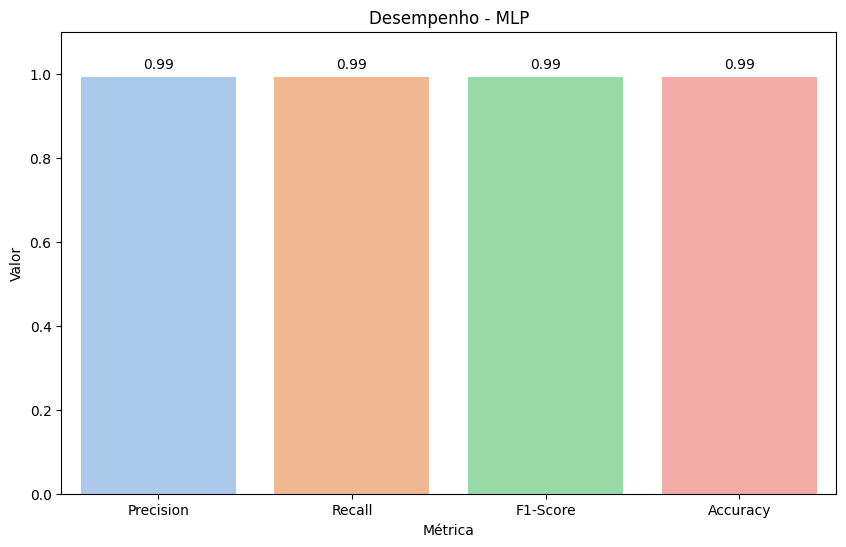

In [13]:
# Calcular as métricas
# Calculating metrics
y_pred = predictsMLP
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
# Creating a DataFrame with metrics
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

# Plotar o gráfico de barras
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='pastel', dodge=False, legend=False)

# Adicionar anotações
# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra / # Distance of the text from the bar
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

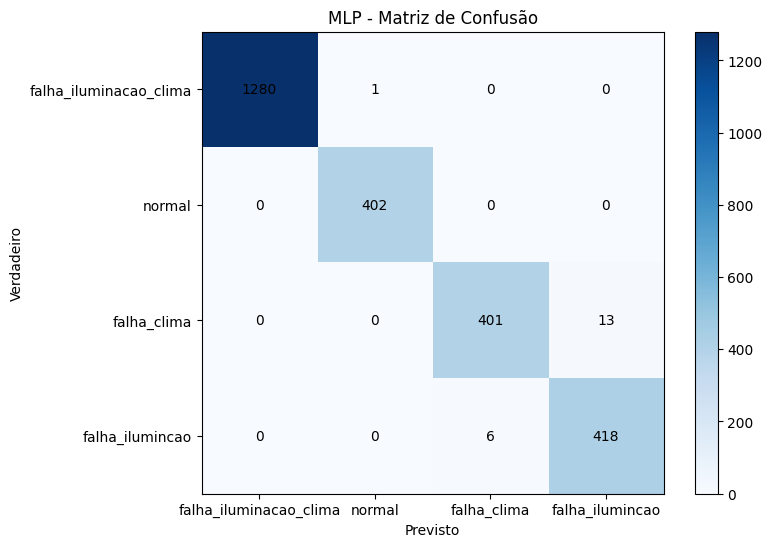

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
#Plotting the confusion matrix with legend
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
# Adding values to each cell of the confusion matrix with legend
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
# Adding legend
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

# SVM

In [15]:
from sklearn.svm import SVC

# Criar e treinar o classificador SVM
# Creating and training the SVM classifier
svm = SVC(gamma=0.01, C=100.0)

svm.fit(x_train, y_train)

# Prever os rótulos para os dados de teste
# Predicting labels for the test data
predictsSVM = svm.predict(x_test)

accuracySVM = accuracy_score(y_test, predictsSVM)
print(f'Precisão do modelo de SVM: {accuracySVM}')

reportSVM = classification_report(y_test, predictsSVM, digits=4)
print(f'\nRelatório de Classificação:\n{reportSVM}')

Precisão do modelo de SVM: 0.950416501388338

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9815    0.9961    0.9888      1281
           1     0.9869    0.9403    0.9631       402
           2     0.8936    0.8720    0.8826       414
           3     0.8779    0.8986    0.8881       424

    accuracy                         0.9504      2521
   macro avg     0.9350    0.9267    0.9306      2521
weighted avg     0.9505    0.9504    0.9503      2521



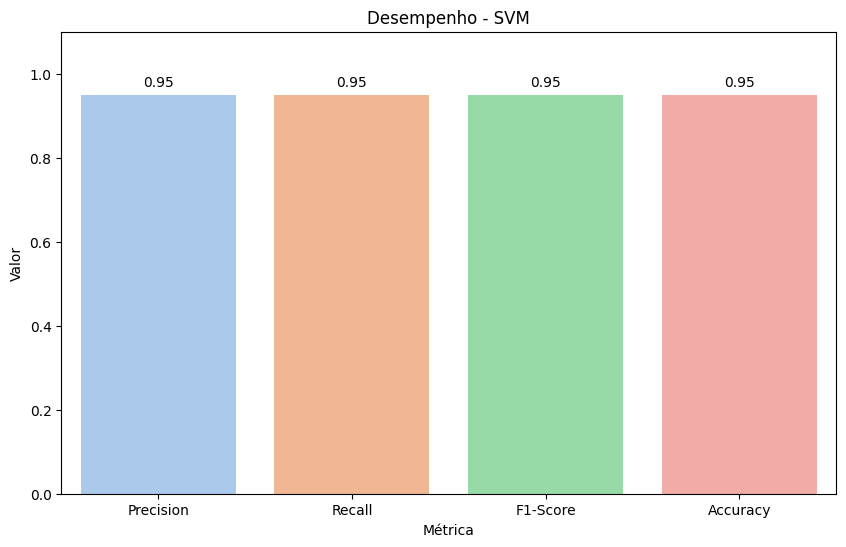

In [16]:
# Calcular as métricas
# Calculating metrics
y_pred = predictsSVM
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
# Creating a DataFrame with metrics
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

# Plotar o gráfico de barras
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='pastel', dodge=False, legend=False)

# Adicionar anotações
# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - SVM')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

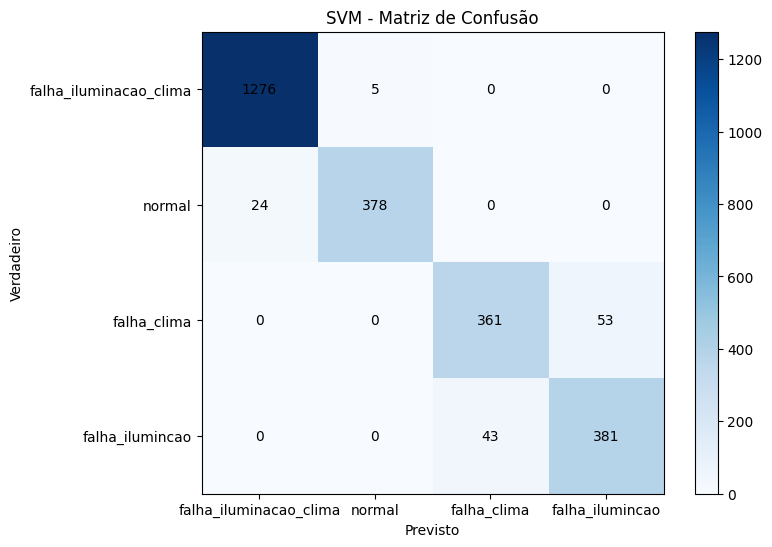

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
# Plotting the confusion matrix with legend
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
# Adding values to each cell of the confusion matrix with legend
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
# Adding legend
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

# Criar e treinar o classificador NB
# Creating and training the NB classifier
nb = GaussianNB()

nb.fit(x_train, y_train)

# Prever os rótulos para os dados de teste
# Predicting labels for the test data
predictsNB = nb.predict(x_test)

accuracyNB = accuracy_score(y_test, predictsNB)
print(f'Precisão do modelo de NB: {accuracyNB}')

reportNB = classification_report(y_test, predictsNB, digits=4)
print(f'\nRelatório de Classificação:\n{reportNB}')

Precisão do modelo de NB: 0.8948829829432765

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    0.8353    0.9103      1281
           1     0.6558    1.0000    0.7921       402
           2     0.9615    0.9058    0.9328       414
           3     0.9129    0.9646    0.9381       424

    accuracy                         0.8949      2521
   macro avg     0.8826    0.9264    0.8933      2521
weighted avg     0.9242    0.8949    0.8998      2521



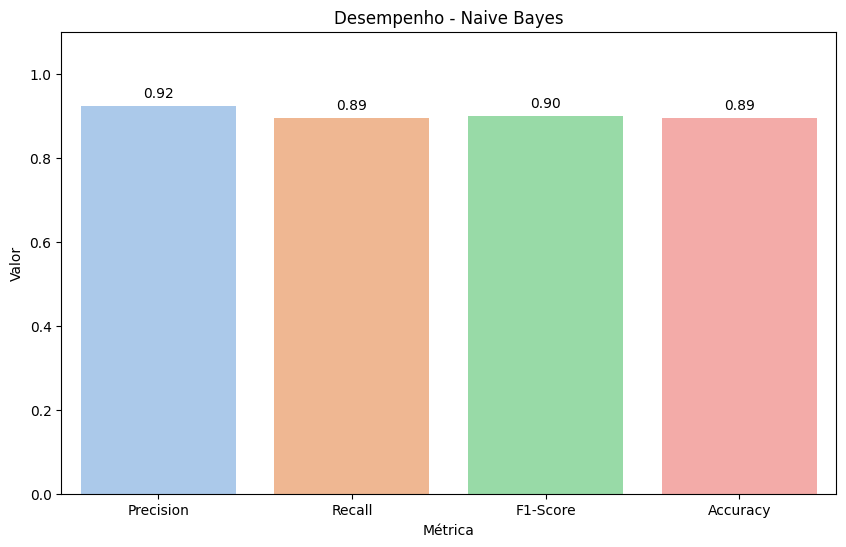

In [19]:
# Calcular as métricas
# Calculating metrics
y_pred = predictsNB
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
# Creating a DataFrame with metrics
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

# Plotar o gráfico de barras
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='pastel', dodge=False, legend=False)

# Adicionar anotações
# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra / # Distance of the text from the bar
                textcoords = 'offset points')

plt.title('Desempenho - Naive Bayes')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

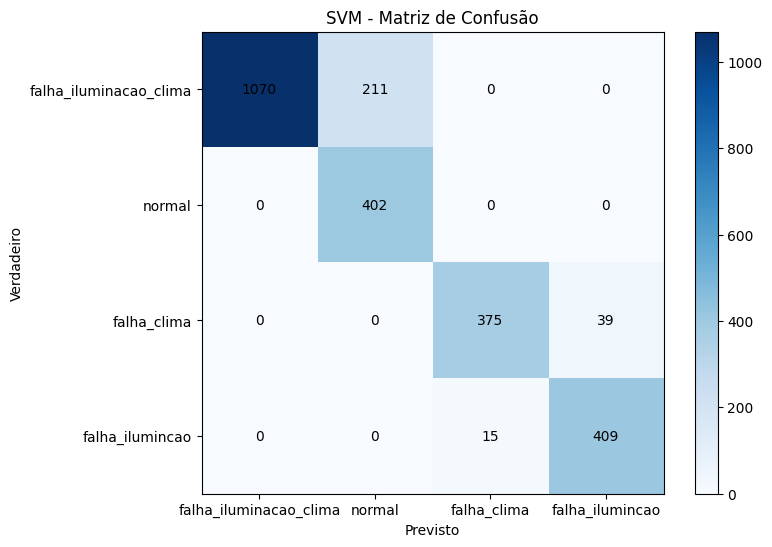

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
# Plotting the confusion matrix with legend
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
# Adding values to each cell of the confusion matrix with legend
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
# Adding legend
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

# Árvore de Decisão (Decision tree)

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Modelagem e escolha dos hiperparâmetros do algoritmo de Decision Tree
# Modeling and choosing hyperparameters for the Decision Tree algorithm
modelDT = DecisionTreeClassifier(
  criterion='entropy',
  max_depth=10,
  min_samples_split=2,
  min_samples_leaf=1,
  max_features=None
)

# Treinando o modelo
# Training the model
modelDT.fit(x_train, y_train)

# Realizando predições
# Making predictions
predictsDT = modelDT.predict(x_test)

accuracyDT = accuracy_score(y_test, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y_test, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.9988099960333201

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    0.9992    0.9996      1281
           1     0.9975    1.0000    0.9988       402
           2     0.9976    0.9976    0.9976       414
           3     0.9976    0.9976    0.9976       424

    accuracy                         0.9988      2521
   macro avg     0.9982    0.9986    0.9984      2521
weighted avg     0.9988    0.9988    0.9988      2521



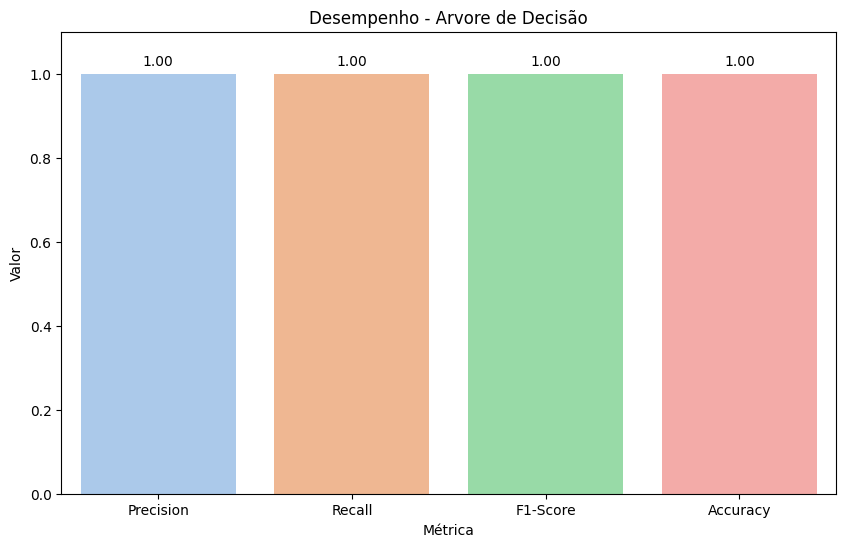

In [22]:
# Calcular as métricas
# Calculating metrics
y_pred = predictsDT
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
# Creating a DataFrame with metrics
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

# Plotar o gráfico de barras
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='pastel', dodge=False, legend=False)

# Adicionar anotações
# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra / # Distance of the text from the bar
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

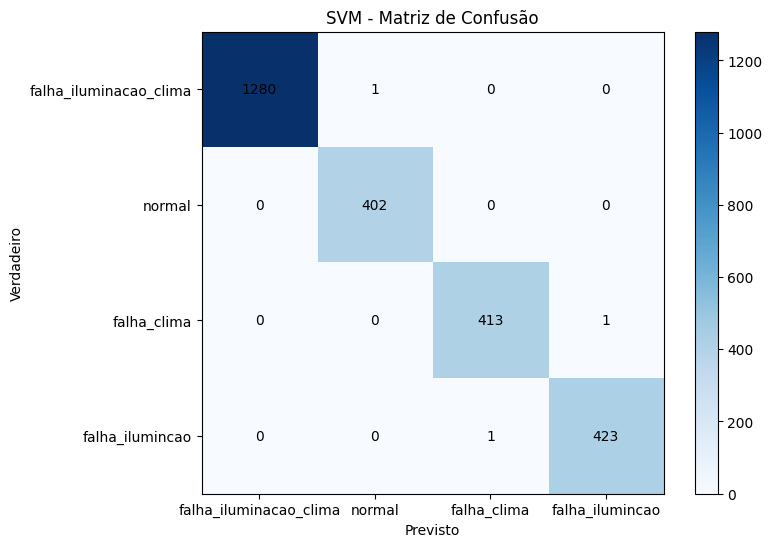

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
# Plotting the confusion matrix with legend
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
# Adding values to each cell of the confusion matrix with legend
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
# Adding legend
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

# Floresta Aleatória (Random Forest)

In [24]:
from sklearn.ensemble import RandomForestClassifier

# MOdelagem e escolha dos hiperparâmetros do algoritmo Random FOrest
# Modeling and choosing hyperparameters for the Random Forest algorithm
modelRF = RandomForestClassifier(
  n_estimators=100,
  criterion='entropy',
  min_samples_split=2,
  min_samples_leaf=1,
  random_state=42
)

# Treinando o modelo
# Training the model
modelRF.fit(x_train, y_train)

# Realizando predições
# Making predictions
predictsRF = modelRF.predict(x_test)

accuracyRF = accuracy_score(y_test, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y_test, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.9996033320111067

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1281
           1     1.0000    1.0000    1.0000       402
           2     0.9976    1.0000    0.9988       414
           3     1.0000    0.9976    0.9988       424

    accuracy                         0.9996      2521
   macro avg     0.9994    0.9994    0.9994      2521
weighted avg     0.9996    0.9996    0.9996      2521



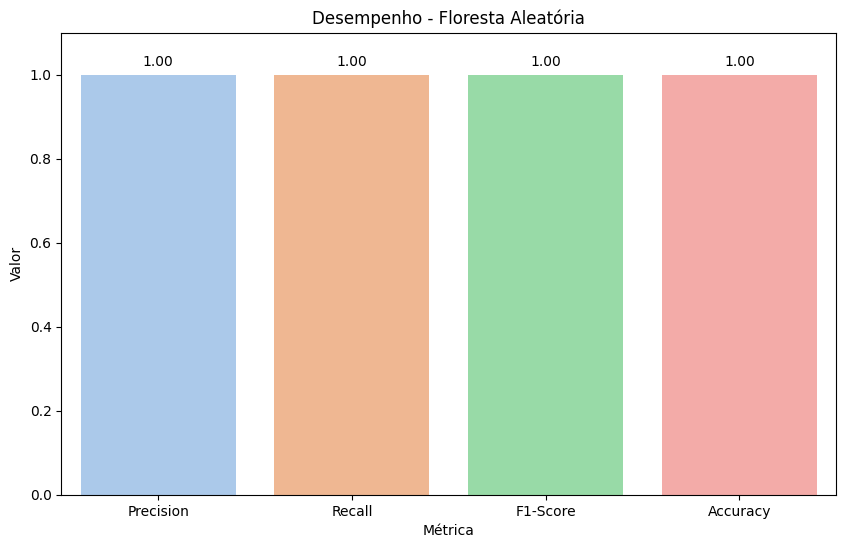

In [25]:
# Calcular as métricas
# Calculating metrics
y_pred = predictsRF
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
# Creating a DataFrame with metrics
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)

# Plotar o gráfico de barras
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='pastel', dodge=False, legend=False)

# Adicionar anotações
# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Floresta Aleatória')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

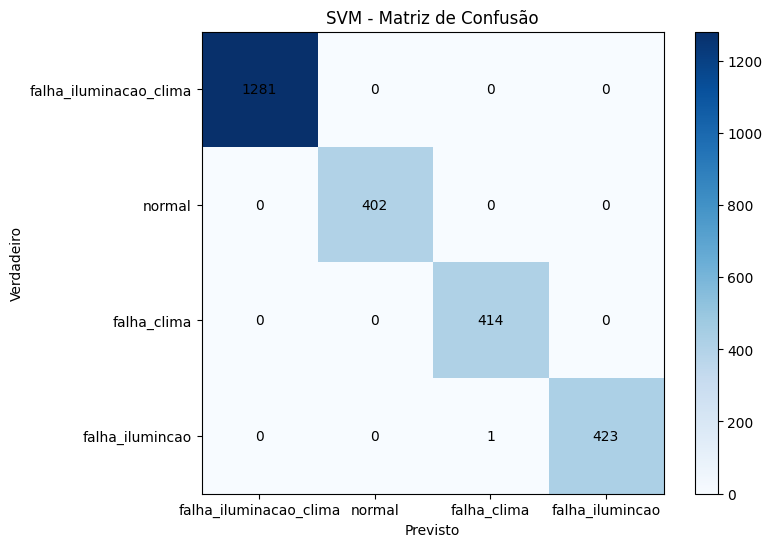

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
# Plotting the confusion matrix with legend
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
# Adding values to each cell of the confusion matrix with legend
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
# Adding legend
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [27]:
import joblib

# Exporta o arquivo .joblib, este é usado dentro do dispositivo de borda para implementar a AI no sistema proposto.
# Exporting the .joblib file, which is used within the edge device to implement AI in the proposed system.
joblib.dump(modelRF, './best_ml.joblib')

['./best_ml.joblib']